In [2]:

import pybullet_envs
import gym
import numpy as np
from sac_torch import Agent
from utils import plot_learning_curve
import numpy as np



.... saving models ....
episode  0 score -153.9 trailing 100 games avg -153.9 steps 1000 HalfCheetah-v2  scale  2
episode  1 score -201.3 trailing 100 games avg -177.6 steps 2000 HalfCheetah-v2  scale  2
episode  2 score -287.7 trailing 100 games avg -214.3 steps 3000 HalfCheetah-v2  scale  2
episode  3 score -253.1 trailing 100 games avg -224.0 steps 4000 HalfCheetah-v2  scale  2
episode  4 score -379.8 trailing 100 games avg -255.2 steps 5000 HalfCheetah-v2  scale  2
episode  5 score -101.4 trailing 100 games avg -229.5 steps 6000 HalfCheetah-v2  scale  2
episode  6 score -265.7 trailing 100 games avg -234.7 steps 7000 HalfCheetah-v2  scale  2
episode  7 score -222.5 trailing 100 games avg -233.2 steps 8000 HalfCheetah-v2  scale  2
episode  8 score -252.0 trailing 100 games avg -235.3 steps 9000 HalfCheetah-v2  scale  2
episode  9 score -212.8 trailing 100 games avg -233.0 steps 10000 HalfCheetah-v2  scale  2
episode  10 score -242.3 trailing 100 games avg -233.9 steps 11000 HalfChee

episode  90 score -85.4 trailing 100 games avg -166.1 steps 91000 HalfCheetah-v2  scale  2
episode  91 score 18.3 trailing 100 games avg -164.1 steps 92000 HalfCheetah-v2  scale  2
episode  92 score -129.2 trailing 100 games avg -163.7 steps 93000 HalfCheetah-v2  scale  2
episode  93 score 35.4 trailing 100 games avg -161.6 steps 94000 HalfCheetah-v2  scale  2
episode  94 score -160.6 trailing 100 games avg -161.5 steps 95000 HalfCheetah-v2  scale  2
episode  95 score -112.5 trailing 100 games avg -161.0 steps 96000 HalfCheetah-v2  scale  2
episode  96 score -48.2 trailing 100 games avg -159.9 steps 97000 HalfCheetah-v2  scale  2
episode  97 score -210.4 trailing 100 games avg -160.4 steps 98000 HalfCheetah-v2  scale  2
episode  98 score -133.7 trailing 100 games avg -160.1 steps 99000 HalfCheetah-v2  scale  2
episode  99 score -106.4 trailing 100 games avg -159.6 steps 100000 HalfCheetah-v2  scale  2
episode  100 score -58.3 trailing 100 games avg -158.6 steps 101000 HalfCheetah-v2  s

episode  165 score -185.1 trailing 100 games avg -63.2 steps 166000 HalfCheetah-v2  scale  2
.... saving models ....
episode  166 score 16.6 trailing 100 games avg -61.2 steps 167000 HalfCheetah-v2  scale  2
episode  167 score -74.3 trailing 100 games avg -62.1 steps 168000 HalfCheetah-v2  scale  2
episode  168 score -186.2 trailing 100 games avg -62.7 steps 169000 HalfCheetah-v2  scale  2
episode  169 score -147.7 trailing 100 games avg -63.1 steps 170000 HalfCheetah-v2  scale  2
.... saving models ....
episode  170 score 73.0 trailing 100 games avg -61.0 steps 171000 HalfCheetah-v2  scale  2
.... saving models ....
episode  171 score -33.8 trailing 100 games avg -59.4 steps 172000 HalfCheetah-v2  scale  2
episode  172 score -58.0 trailing 100 games avg -59.6 steps 173000 HalfCheetah-v2  scale  2
.... saving models ....
episode  173 score -66.2 trailing 100 games avg -58.7 steps 174000 HalfCheetah-v2  scale  2
episode  174 score -97.4 trailing 100 games avg -58.9 steps 175000 HalfChee

episode  245 score -46.5 trailing 100 games avg -24.9 steps 246000 HalfCheetah-v2  scale  2
episode  246 score -106.4 trailing 100 games avg -26.0 steps 247000 HalfCheetah-v2  scale  2
episode  247 score -2.0 trailing 100 games avg -26.7 steps 248000 HalfCheetah-v2  scale  2
.... saving models ....
episode  248 score 158.1 trailing 100 games avg -23.5 steps 249000 HalfCheetah-v2  scale  2
.... saving models ....
episode  249 score -78.3 trailing 100 games avg -23.2 steps 250000 HalfCheetah-v2  scale  2


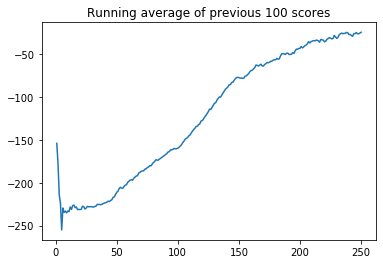

In [4]:


#env_id = 'LunarLanderContinuous-v2'
#env_id = 'BipedalWalker-v2'
#env_id = 'AntBulletEnv-v0'
#env_id = 'InvertedPendulumBulletEnv-v0'
#env_id = 'CartPoleContinuousBulletEnv-v0'
env_id = 'HalfCheetah-v2'
env = gym.make(env_id)
agent = Agent(alpha=0.0003, beta=0.0003, reward_scale=2, env_id=env_id,
            input_dims=env.observation_space.shape, tau=0.005,
            env=env, batch_size=256, layer1_size=256, layer2_size=256,
            n_actions=env.action_space.shape[0])
n_games = 250
filename = env_id + '_'+ str(n_games) + 'games_scale' + str(agent.scale) + \
                '_clamp_on_sigma.png'
figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False
if load_checkpoint:
    agent.load_models()
    env.render(mode='human')
steps = 0
for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        steps += 1
        agent.remember(observation, action, reward, observation_, done)
        if not load_checkpoint:
            agent.learn()
        score += reward
        observation = observation_
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score,
            'trailing 100 games avg %.1f' % avg_score,
            'steps %d' % steps, env_id,
            ' scale ', agent.scale)
if not load_checkpoint:
    x = [i+1 for i in range(n_games)]
    plot_learning_curve(x, score_history, figure_file)
